# SLU04 - Basic Stats with Pandas: Exercises notebook

In these exercises, we'll use a dataset with information on books from [Goodreads](https://www.goodreads.com/). Goodreads is a platform that allows users to rate and review books. The dataset has been extracted from [Kaggle](https://www.kaggle.com/).

## Objective

The goal of these exercises is for you to learn how to use pandas to obtain simple statistics from datasets. The following will be tested:
- Minimum, maximum, argmin, argmax
- Mean, median & mode
- Standard deviation and variance
- Skewness & Kurtosis
- Quantiles
- Outliers & how to deal with them

## Dataset information

![](media/goodreads.jpg)

This dataset contains a sample of ~57,000 books rated and reviewed by users on Goodreads.

The fields in the dataset are the following:

- `Id`: Book ID on Goodreads
- `Name`: Book title
- `pagesNumber`: Pages for each book
- `Publisher`: Publisher name
- `CountsOfReview`: Counts of text review
- `PublishYear`: Year the book was published
- `Authors`: Book author
- `Rating`: Average rating of the book (0.0 - 5.0)
- `ISBN`: Unique book identifier (International Standard Book Number)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import hashlib

In [2]:
data = pd.read_csv('data/books.csv', delimiter=';').set_index("Id")
data.head()

,Name,pagesNumber,Publisher,CountsOfReview,PublishYear,Authors,Rating,ISBN
Id,,,,,,,,
2,Harry Potter and the Order of the Phoenix (Har...,870,Scholastic Inc.,29770,2004,J.K. Rowling,4.50,439358078
4,Harry Potter and the Chamber of Secrets (Harry...,352,Scholastic,244,2003,J.K. Rowling,4.42,439554896
5,Harry Potter and the Prisoner of Azkaban (Harr...,435,Scholastic Inc.,37093,2004,J.K. Rowling,4.57,043965548X
8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",2690,Scholastic,166,2004,J.K. Rowling,4.78,439682584
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",152,Nimble Books,1,2005,W. Frederick Zimmerman,3.79,976540606


----

# Exercise 1

Let's start by performing some descriptive statistics:

- Check how many values exist for each column
- Sum the `Rating` variable and round the result to #.## (2 decimal digits) to supress double-precision floating-point numbers accuracy issues
- Obtain a NumPy array of all the different years we have in the `PublishYear` preserving the dataframe order

In [3]:
data.count()

Name              57011
pagesNumber       57011
Publisher         57011
CountsOfReview    57011
PublishYear       57011
Authors           57011
Rating            57011
ISBN              57011
dtype: int64

In [4]:
# count_values = ...
# sum_rating = ...
# publish_years = ... # Hint: Using the first 5 rows of the dataframe
#                       as example, the result should be:
#                       array([2004, 2003, 2005, ...])

# YOUR CODE HERE
count_values =data.count()
sum_rating = round(data.Rating.sum(),2)
publish_years = data.PublishYear.unique()

##### Asserts

In [5]:
count_values_hash = "dc7a392aa24445d85c639c640499a2dc31bb94b416d31c858b74dfa54cca6cc0"
sum_rating_hash = "1708576c389ff9f8edec5f4904ec8b204218a0b509a90ea9d64f920ae949b8e3"
publish_years_hash = "e048fc8ef688fbdf7d9717e944b0bc15ebb9774f2ffa8ec030b64d30a77d0d94"

assert count_values_hash == hashlib.sha256(bytes(count_values.iloc[0])).hexdigest(), "Incorrect missing values count."
assert sum_rating_hash == hashlib.sha256(bytes(sum_rating)).hexdigest(), "Incorrect sum of ratings."
assert publish_years_hash == hashlib.sha256(bytes(publish_years)).hexdigest(), "Incorrect list of years."

print("---- Yay! All asserts passed ---- ")

---- Yay! All asserts passed ---- 


----

# Exercise 2 

Let's have a look at the `Rating` variable. Find the following information:

- What are the minimum and maximum rating values?
- What is the most common rating?
- What is the average rating?
- What is the median rating?
- What is the standard deviation of the rating?

In [6]:
data.Rating.std()

1.0117947712534772

In [7]:
# maximum = ...
# minimum = ...
# most_common = ...  # Hint: you should return a number, not a pandas Series :)
# mean = ...
# median = ...
# standard_deviation = ...

# YOUR CODE HERE
maximum = data.Rating.max()
minimum = data.Rating.min()
most_common = data.Rating.mode()[0]
mean = data.Rating.mean()
median = data.Rating.median()
standard_deviation = data.Rating.std()

##### Asserts

In [8]:
np.testing.assert_approx_equal(maximum, 5.0)
np.testing.assert_approx_equal(minimum, 0.0)
assert isinstance(most_common, float), "most_common should be of type float"
np.testing.assert_approx_equal(most_common, 0.0)
np.testing.assert_approx_equal(mean, 3.66, 2)
np.testing.assert_approx_equal(median, 3.90, 2)
np.testing.assert_approx_equal(standard_deviation, 1.01, 2)

print("---- Well Done! All asserts passed ---- ")

---- Well Done! All asserts passed ---- 


----

# Exercise 3 

Let's have a look at the `pagesNumber` variable.

- How many pages has the longest book? What is its Id? What is its Title?
- How many pages has the shortest book? What is its Id? What is its Title?


In [9]:
data.pagesNumber.max()

3454

In [10]:
data.pagesNumber.idxmax()

31557

In [11]:
data.loc[data.pagesNumber.idxmax()]

Name              Encyclopedia of the Human Brain, Four-Volume Set
pagesNumber                                                   3454
Publisher                                           Academic Press
CountsOfReview                                                   1
PublishYear                                                   2002
Authors                                          V.S. Ramachandran
Rating                                                         4.0
ISBN                                                     122272102
Name: 31557, dtype: object

In [12]:
data.loc[data.pagesNumber.idxmax(),'Name']

'Encyclopedia of the Human Brain, Four-Volume Set'

In [13]:
number_pages_longest_book = data.pagesNumber.max()
id_longest_book = data.pagesNumber.idxmax()
title_longest_book = data.loc[data.pagesNumber.idxmax(),'Name']

number_pages_shortest_book = data.pagesNumber.min()
id_shortest_book = data.pagesNumber.idxmin()
title_shortest_book = data.loc[data.pagesNumber.idxmin(),'Name']

In [14]:
title_shortest_book 

'The 5 Love Languages / The 5 Love Languages Journal'

In [15]:
title_longest_book

'Encyclopedia of the Human Brain, Four-Volume Set'

In [16]:
data.loc[data.pagesNumber == data.pagesNumber.max()]

,Name,pagesNumber,Publisher,CountsOfReview,PublishYear,Authors,Rating,ISBN
Id,,,,,,,,
31557,"Encyclopedia of the Human Brain, Four-Volume Set",3454,Academic Press,1,2002,V.S. Ramachandran,4.0,122272102


##### Asserts

In [17]:
number_pages_longest_book_hash = "397cc9a4ac830eb287dcd4f6ad5fdbd9bb0356026b130790026f7d60415d90fa"
id_longest_book_hash = "c5abddc940877a43d0fea09d3df6136f27d0895c5245ae764b6ee2f85da722b7"
title_longest_book_hash = "6ce5428314264af44259505ed57cc744a8d80ad958481a1f712fec5adceb153f"

number_pages_shortest_book_hash = "e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855"
id_shortest_book_hash = "11ba380b8f69673109f474ea4e91ea85b0733e1afa1aae9662a8c1b4f243485c"
title_shortest_book_hash = "7ae602589ba763e06517cec687f4613b64c1bd7bd090de7cce09d1e36e6ca28c"

assert number_pages_longest_book_hash == hashlib.sha256(bytes(number_pages_longest_book)).hexdigest(), "Wrong answer."\
"Please check the number of pages of the longest book."
assert id_longest_book_hash == hashlib.sha256(bytes(id_longest_book)).hexdigest(), "Wrong answer."\
"Please check the id of the longest book."
assert title_longest_book_hash == hashlib.sha256(bytes(title_longest_book, "utf-8")).hexdigest(), "Wrong answer."\
"Please check the title of the longest book."
assert number_pages_shortest_book_hash == hashlib.sha256(bytes(number_pages_shortest_book)).hexdigest(), "Wrong answer."\
"Please check the number of pages of the shortest book."
assert id_shortest_book_hash == hashlib.sha256(bytes(id_shortest_book)).hexdigest(), "Wrong answer."\
"Please check the id of the shortest book."
assert title_shortest_book_hash == hashlib.sha256(bytes(title_shortest_book, "utf-8")).hexdigest(), "Wrong answer."\
"Please check the title of the shortest book."

print("---- UhuuuuL! All asserts passed ---- ")

---- UhuuuuL! All asserts passed ---- 


----

# Exercise 4

However, remember that `idxmax` and `idxmin` only return the index of the first of occurrence.

Find how many books are rated with the maximum value.

In [18]:
data.loc[data.Rating == data.Rating.max()].nunique()

Name              988
pagesNumber       369
Publisher         606
CountsOfReview      5
PublishYear        50
Authors           934
Rating              1
ISBN              988
dtype: int64

In [19]:
max_rated_books = len(data.loc[data.Rating == data.Rating.max()])


In [20]:
max_rated_books

990

##### Asserts

In [21]:
max_rated_books_hash = "3449ddf7ca912858ea7e87b19040bf7b9b529099f50d0f3c3388c6c79083ae0b"

assert max_rated_books_hash == hashlib.sha256(bytes(max_rated_books)).hexdigest(), 'Not correct, try again.'

print("---- Correct! Assert passed ---- ")

---- Correct! Assert passed ---- 


----

# Exercise 5.1

Let's check the distribution of `Rating`.

- plot a histogram for the distribution of `Rating` with 20 bins
- check the skewness of the distribution (do you expect it to be positive or negative?)

The skewness measure is -2.776.


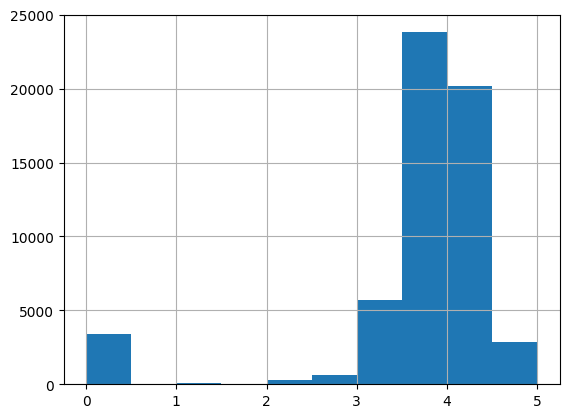

In [22]:
# plot a histogram with 20 bins
data.Rating.hist()

# compute the skewness measure
skew = data.Rating.skew()


print("The skewness measure is {:.3f}.".format(skew))

#### Asserts

In [23]:
np.testing.assert_approx_equal(skew, -2.776, 2)

print("---- Horay! Assert passed ---- ")

---- Horay! Assert passed ---- 


----

# Exercise 5.2

Let's now check the kurtosis for the plotted `Rating` distribution and compare it with a normal distribution with the same characteristics.

<Axes: ylabel='Frequency'>

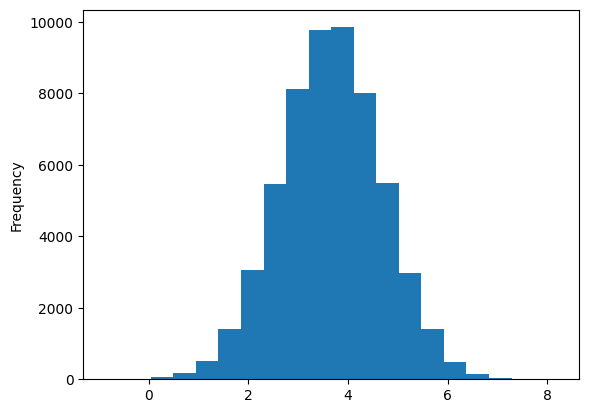

In [24]:
np.random.seed(42) # we set a random seed so all notebooks generate the same random numbers

mean, std, n = data["Rating"].mean(), data["Rating"].std(), data["Rating"].shape[0]
random_normal_returns = np.random.normal(mean, std, n) # here, we generate the random normal distribution
data_normal = pd.Series(data=random_normal_returns, index=data.index)

data_normal.plot.hist(bins=20)

In [25]:
# compute the kurtosis measures
kurt = data.Rating.kurt()
kurt_normal = data_normal.kurt()




print("The kurtosis measure for the data distribution is {:.1f}.".format(kurt))
print("The kurtosis measure for the random normal distribution is {:.1f}.".format(kurt_normal))

The kurtosis measure for the data distribution is 7.5.
The kurtosis measure for the random normal distribution is -0.0.


##### Asserts

In [26]:
np.testing.assert_approx_equal(kurt, 7.5, 2)
np.testing.assert_approx_equal(kurt_normal, 0, 0)

print("---- Yeah! all asserts passed ---- ")

---- Yeah! all asserts passed ---- 


----

# Exercise 6

Find the value of the first, second, and third quartiles of the plotted `Rating` distribution. Find also the value of the mean. Is the second quartile equal to the mean?

In [27]:
# output quartiles as pandas Series
returns_quartiles = data.Rating.quantile(q=[.25, .5, .75])
mean_rating =data.Rating.mean()



#### Asserts

In [28]:
mean_rating

3.65790952623178

In [29]:
assert isinstance(returns_quartiles, pd.Series)
np.testing.assert_approx_equal(returns_quartiles[0.25], 3.62, 2)
np.testing.assert_approx_equal(mean_rating, 3.657, 2)

print("---- Yoooo! All asserts passed ---- ")

---- Yoooo! All asserts passed ---- 


----

# Exercise 7

There's a pandas method really useful to summarize variables. Do you remember what it is?

Apply the method on the `CountsOfReview` column and investigate the results.

In [30]:
data.columns

Index(['Name', 'pagesNumber', 'Publisher', 'CountsOfReview', 'PublishYear',
       'Authors', 'Rating', 'ISBN'],
      dtype='object')

In [31]:
CountsOfReview_summary=data.CountsOfReview.describe()



In [32]:
CountsOfReview_summary

count    57011.000000
mean       138.301819
std       1150.434280
min          0.000000
25%          0.000000
50%          4.000000
75%         31.000000
max      94850.000000
Name: CountsOfReview, dtype: float64

#### Asserts

In [33]:
assert isinstance(CountsOfReview_summary, pd.Series), "Make sure you apply the correct method." \
" It is used to 'describe' the variable. :)"
np.testing.assert_approx_equal(CountsOfReview_summary.max(), 94850.0, 2)

print("---- Weee! All asserts passed ---- ")

---- Weee! All asserts passed ---- 


----

# Exercise 8

Let's focus on the outliers for the `CountsOfReview`. First let's check if our data has 0 counts of review:

In [34]:
data.loc[data["CountsOfReview"] == 0].head()

,Name,pagesNumber,Publisher,CountsOfReview,PublishYear,Authors,Rating,ISBN
Id,,,,,,,,
46,Ruby Quickly: Ruby and Rails for the Real World,360,Manning Publications,0,2006,Mark Watson,3.40,1932394745
54,Molly Hatchet - 5 of the Best,56,Cherry Lane Music Company,0,2003,Molly Hatchet,4.33,1575606240
56,The Woodsman and His Hatchet: Eighty Years on ...,150,Stoneydale Press,0,1996,Bud Cheff Sr.,3.60,912299622
108,The Secrets of Frank Herbert's Dune,160,iBooks,0,2000,James Van Hise,3.52,074340730X
131,The Power of One: The Solo Play for Playwright...,240,Heinemann Drama,0,2000,Louis E. Catron,3.67,325001537


There are several `CountsOfReview` with 0. To simplify for now, let's drop them.

In [35]:
data_non_zero = data.drop(data.loc[data["CountsOfReview"] == 0].index, axis=0)

How to deal with these outliers?

In the Learning Notebook, you learned a few ways to deal with the outliers, in case they are negatively affecting your Machine Learning models. In this exercise, let's explore the **log transformation** and see if it helps us in this case.

Do the following:

- Obtain the mean and the median of the `CountsOfReview`; which one is greater?
- Create a new column named `log_CountsOfReview` with the log of  `CountsOfReview`;
- Obtain the mean and the median of the log of `CountsOfReview`; are they very different from each other?
- Plot `log_CountsOfReview` using a histogram with 20 bins. Compare the results.
- What do you think? Were the outliers dealt with?

In [36]:
data_non_zero

,Name,pagesNumber,Publisher,CountsOfReview,PublishYear,Authors,Rating,ISBN
Id,,,,,,,,
2,Harry Potter and the Order of the Phoenix (Har...,870,Scholastic Inc.,29770,2004,J.K. Rowling,4.50,439358078
4,Harry Potter and the Chamber of Secrets (Harry...,352,Scholastic,244,2003,J.K. Rowling,4.42,439554896
5,Harry Potter and the Prisoner of Azkaban (Harr...,435,Scholastic Inc.,37093,2004,J.K. Rowling,4.57,043965548X
8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",2690,Scholastic,166,2004,J.K. Rowling,4.78,439682584
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",152,Nimble Books,1,2005,W. Frederick Zimmerman,3.79,976540606
...,...,...,...,...,...,...,...,...
99991,The Best American Science and Nature Writing 2003,352,Mariner Books,7,2003,Richard Dawkins,4.02,618178929
99992,The Best American Science and Nature Writing 2000,265,Mariner Books,7,2000,David Quammen,3.99,618082956
99993,The Best American Science and Nature Writing 2002,336,Mariner Books,7,2002,Natalie Angier,4.11,618134786


In [37]:
np.log(data_non_zero.CountsOfReview)

Id
2        10.301256
4         5.497168
5        10.521184
8         5.111988
9         0.000000
           ...    
99991     1.945910
99992     1.945910
99993     1.945910
99997     1.609438
99999     1.098612
Name: CountsOfReview, Length: 41904, dtype: float64

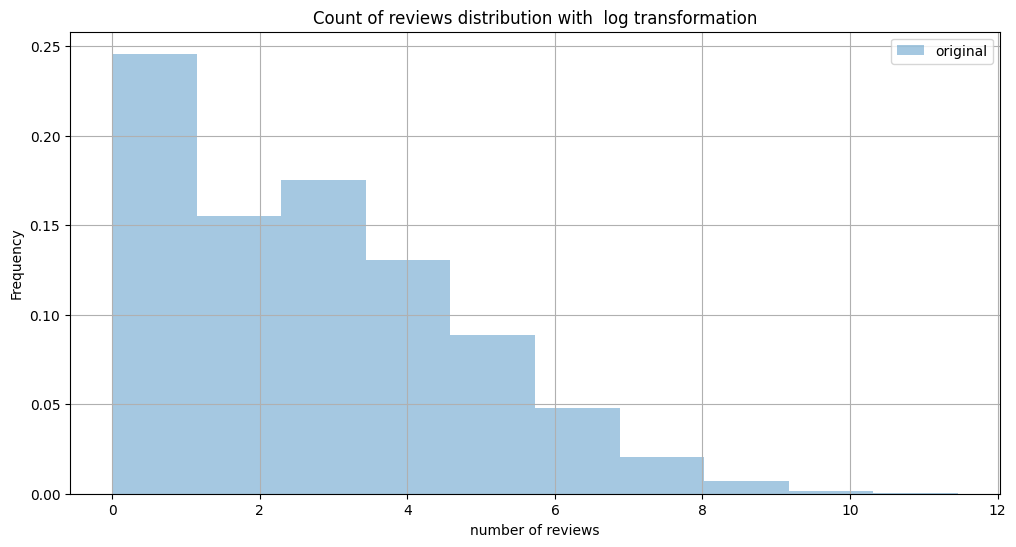

The CountsOfReview has mean 188 and median 12
The log of the CountsOfReview has mean 2.7 and median 2.5


In [38]:
counts_of_review_mean = data_non_zero.CountsOfReview.mean()
counts_of_review_median = data_non_zero.CountsOfReview.median()
data_non_zero["log_CountsOfReview"] = np.log(data_non_zero.CountsOfReview)
log_counts_of_review_mean = data_non_zero.log_CountsOfReview.mean()
log_counts_of_review_median = data_non_zero.log_CountsOfReview.median()

# plot a histogram with 20 bins

# YOUR CODE HERE
# plot the histograms 
data_non_zero.log_CountsOfReview.hist(alpha=.4, label='original', figsize=(12,6), density=True)
plt.legend()
plt.xlabel('number of reviews')
plt.ylabel('Frequency')
plt.title('Count of reviews distribution with  log transformation')
plt.show();

print('The CountsOfReview has mean %d and median %d' % (counts_of_review_mean, counts_of_review_median))
print('The log of the CountsOfReview has mean %0.1f and median %0.1f' % (log_counts_of_review_mean, log_counts_of_review_median))

#### Asserts

In [39]:
assert math.isclose(counts_of_review_mean, 188.1, abs_tol=0.1)
assert math.isclose(counts_of_review_median, 12, abs_tol=0.1)
assert math.isclose(log_counts_of_review_mean, 2.72, abs_tol=0.01)
assert math.isclose(log_counts_of_review_median, 2.48, abs_tol=0.01)
assert math.isclose(data_non_zero['log_CountsOfReview'].sum(), 114053.23, abs_tol=0.1)

print("---- You did it!! All asserts passed! ---- ")

---- You did it!! All asserts passed! ---- 


----

Congratulations! You have finished. Good luck with the upcoming SLUs!


![](media/complete.gif)

# Submit your work!

<!Insert link for batch7 submit instructions:>
<!To submit your work, [follow the steps here, in the step "Grading the Exercise Notebook"!](url)>